In [4]:
!pip install xgboost imbalanced-learn


✅ Model Accuracy: 0.9992644539513597

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.64      0.96      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



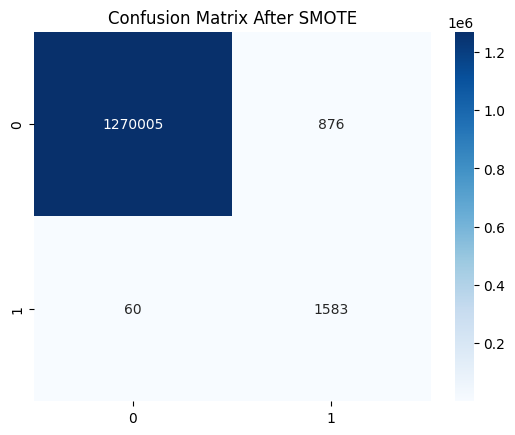

✅ Model saved as fraud_detection_model.pkl


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 📌 1. Load Dataset
df = pd.read_csv('/kaggle/input/financial-fraud-detection-dataset/Synthetic_Financial_datasets_log.csv')

# 📌 2. Encode Categorical Columns
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

# 📌 3. Drop Unnecessary Columns
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

# 📌 4. Split Features and Target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# 📌 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 6. Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 7. Apply SMOTE for Imbalanced Data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 📌 8. Train Model
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_resampled, y_resampled)

# 📌 9. Evaluate Model
y_pred_balanced = model_balanced.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_balanced))

# 📌 10. Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix After SMOTE")
plt.show()

# 📌 11. Save Model
with open("fraud_detection_model.pkl", "wb") as file:
    pickle.dump(model_balanced, file)

print("✅ Model saved as fraud_detection_model.pkl")


In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 📌 1. Load Dataset
df = pd.read_csv('/kaggle/input/financial-fraud-detection-dataset/Synthetic_Financial_datasets_log.csv')

# 📌 2. Encode Categorical Columns
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

# 📌 3. Drop Unnecessary Columns
df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

# 📌 4. Split Features and Target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# 📌 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 6. Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 7. Apply SMOTE for Imbalanced Data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 📌 8. Train Model with scikit-learn 1.6.1
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_resampled, y_resampled)

# 📌 9. Evaluate Model
y_pred_balanced = model_balanced.predict(X_test)
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_balanced))

# 📌 10. Save Model for FastAPI
with open("fraud_detection_model.pkl", "wb") as file:
    pickle.dump(model_balanced, file)

print("✅ New Model Saved: fraud_detection_model.pkl (Compatible with scikit-learn 1.6.1)")


✅ Model Accuracy: 0.9992644539513597

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.64      0.96      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

✅ New Model Saved: fraud_detection_model.pkl (Compatible with scikit-learn 1.6.1)
